# 第十五讲 子空间投影

首先考虑二维空间上的投影情况，现有直线 $A$ 和向量 $b$，且 $A, b \in \mathbb{R}^2$，作向量 $b$ 在直线 $A$ 上的**投影向量**（Projection Vector）$p$：

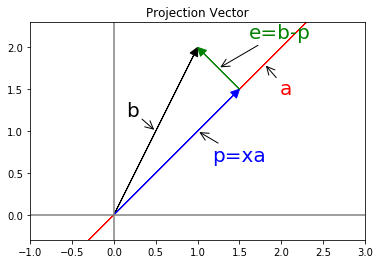

In [2]:
%matplotlib inline
from functools import partial
import matplotlib.pyplot as plt
import numpy as np

plt.axis('equal')
plt.axis([-1, 3, -1, 3])

plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')

plt.arrow(-1, -1, 4, 4, color='red', length_includes_head=True)
plt.arrow(0, 0, 1, 2, head_width=0.1, head_length=0.1, color='black', length_includes_head=True)
plt.arrow(0, 0, 1.5, 1.5, head_width=0.1, head_length=0.1, color='blue', length_includes_head=True)
plt.arrow(1.5, 1.5, -0.5, 0.5, head_width=0.1, head_length=0.1, color='green', length_includes_head=True)

plt.annotate('a', xy=(1.8, 1.8), xytext=(15, -30), textcoords='offset points', color='red', size=20, arrowprops=dict(arrowstyle="->"))
plt.annotate('b', xy=(0.5, 1), xytext=(-30, 15), textcoords='offset points', color='black', size=20, arrowprops=dict(arrowstyle="->"))
plt.annotate('p=xa', xy=(1, 1), xytext=(15, -30), textcoords='offset points', color='blue', size=20, arrowprops=dict(arrowstyle="->"))
plt.annotate('e=b-p', xy=(1.25, 1.75), xytext=(30, 30), textcoords='offset points', color='green', size=20, arrowprops=dict(arrowstyle="->"))

plt.title('Projection Vector')
plt.show()

向量 $p$ 一定落在直线 $A$ 上，$A$ 可以看作一个一维的空间，取空间内的一组基向量 $a$，那么向量 $p$ 一定和 $a$ 成倍数关系，记作 $p = xa$。向量 $e$ 可以理解称误差向量（Error Vector），且 $e = b - p, e \perp a$。因为向量 $e$ 垂直于向量 $a$，所以有 $$a^Te = 0 \Rightarrow a^T(b - p) = 0 \Rightarrow a^Tb = a^Tb \Rightarrow a^Tb = a^Txa \Rightarrow  a^Tb = xa^Ta \Rightarrow x = \frac{a^Tb}{a^Ta}$$

因为 $p = xa = a\frac{a^Tb}{a^Ta} = \frac{aa^T}{a^Ta}b$，由此引入**投影矩阵**（Projection Matrix），记作 $P$， $P = \frac{aa^T}{a^Ta}$，显而易见，向量 $b$ 乘以相应的投影矩阵可以得到对应空间上的投影。在这个例子中，矩阵 $P$ 的列空间即为直线 $A$，即 $C(P) = A$。

投影矩阵具有两个性质：
* 矩阵具有对称性，即 $P^T = P$
* 如果向量在投影空间上，那么经过投影仍然是它本身，也就是 $P^2 = P$

为什么要投影？因为在解方程组 $Ax = b$ 的过程中，当 $b$ 不在矩阵 $A$ 的列空间上时，方程组无解，所以我们只能解出其近似解，而通过投影，可以在矩阵 $A$ 的列空间上找到最接近向量 $b$ 的向量 $p$，即向量 $b$ 在空间 $C(A)$ 的投影。 因此，我们可以解出 $A\hat{x} = p$，其中 $\hat{x}$ 为方程组 $Ax = b$ 的近似解。

怎么获得投影矩阵？上面提到，误差向量 $e = b - p$，并且它垂直于空间 $C(A)$，所以有 $$Ae = 0 \Rightarrow A(b - p) = 0 \Rightarrow A(b - A\hat{x}) = 0 \Rightarrow A^TA\hat{x} = A^Tb \Rightarrow \hat{x} = (A^TA)^{-1}A^Tb$$

因为 $p = A\hat{x}$，所以有 $p = A(A^TA)^{-1}A^Tb$，则 $P = A(A^TA)^{-1}A^T$，当然前提是矩阵 $(A^TA)$ 可逆的情况下，因为当 $(A^TA)$ 不可逆时，说明矩阵 $A$ 的列向量不是线性无关的，即行列不满秩的情况。在[第八讲](http://nbviewer.jupyter.org/github/JeraKrs/Notes/blob/master/Linear-algebra/Lecture08.ipynb)中讨论的方程可解性，行满秩的情况是一定有解，而列满秩时，$(A^TA)$ 可逆，所以当方程组无解时，可以通过投影求得近似解。那么在行列不满秩时，是不能通过投影求近似解的。

需要注意的是 $P=A(A^TA)^{−1}$ 是不能继续化简为 $P=AA^{-1}(A^T)^{-1}A^T = I$ 的，因为这里的 $A$ 并不是一个可逆方阵。或者说，如果 $A$ 是一个 $n$ 阶可逆方阵，则 $A$ 的列空间就是整个 $\mathbb{R}^n$ 空间，那么 $b$ 原本就落在空间内。

现在讨论矩阵 $P$ 是否满足投影矩阵的两个性质：
* $P^T = (A(A^TA)^{-1}A^T)^T = A(A^TA)^{-1}A^T = P$
* $P^2 = (A(A^TA)^{-1}A^T)^2 = A(A^TA)^{-1}A^TA(A^TA)^{-1}A^T = A(A^TA)^{-1}A^T = P$